# Setup

In [1]:
"""
Add parent directorys to current path
"""
import os.path
import sys


for p in ['..', '../..', '../../..', '../../../..']:
    d = os.path.abspath(p)
    if d not in sys.path:
        sys.path.insert(0,d)

        
"""
Add tiger-env directory to current path
Still not sure why this is needed.
"""
d = os.path.abspath('../../../../../custom_envs/gym-tiger')
if d not in sys.path:
    sys.path.insert(0, d)


"""
Enable hot-reloading
"""    
from notebook_utils import import_module_by_name, reload_module_by_name


def reload():
    """Helper function for hot-reloading QLearnerObsSeq class from source"""
    reload_module_by_name(
        'experiments.qlearning.basic.qlearner_obs_seq.qlearner_obs_seq',
        'QLearnerObsSeq')
    global QLearnerObsSingle
    from experiments.qlearning.basic.qlearner_obs_single.qlearner_obs_seq \
        import QLearnerObsSeq

# Setup ENV and Model

In [2]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from experiments.qlearning.basic.utils import play_one, plot_running_avg
from experiments.qlearning.basic.qlearner_obs_seq.qlearner_obs_seq \
    import QLearnerObsSeq

env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=500)
model = QLearnerObsSeq(env, initial_alpha=.5, gamma=.9, alpha_decay=.4, seq_len=3)
eps = 1
n = 0
done = False
ot = env.reset()

/Users/jblandin/miniconda3/envs/research/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


# Take one action and update Q

$$
Q(s_{t-1}, a_{t-1}) = Q(s_{t-1}, a_{t-1}) + \alpha \big[ r_t + \gamma \cdot Q(s_t, a_t) - Q(s_{t-1}, a_{t-1}) \big]
$$

In [3]:
if done:
    ot = env.reset()
print(str(model))
otm1 = ot
atm1 = model.sample_action(otm1, eps)
ot, r, done, info = env.step(atm1)
at = model.best_action(ot)
model.update(otm1, atm1, r, ot, at)
_otm1 = env.translate_obs(otm1)
_atm1 = env.translate_action(atm1)
print(_otm1, ',', _atm1, ',', r)
print(str(model))



                                                | OPEN LEFT | OPEN RIGHT | LISTEN
----------------------------------------------- | --------- | ---------- | ------


START , OPEN_LEFT , -100


                                                | OPEN LEFT | OPEN RIGHT | LISTEN
----------------------------------------------- | --------- | ---------- | ------
['START']                                             -50.0 |        0.0 |    0.0




# Play 1 Episode (500 steps)

In [4]:
print(str(model))
play_one(env, model, eps, verbose=True)
print(str(model))



                                                | OPEN LEFT | OPEN RIGHT | LISTEN
----------------------------------------------- | --------- | ---------- | ------
['START']                                             -50.0 |        0.0 |    0.0


o_t-n,...,o_t-1                                 | o_t-1       | a_t-1      | r     | o_t         | a_t       
----------------------------------------------------------------------------------------------------
['START', 'START']                              | START       | OPEN_RIGHT | -100  | GROWL_RIGHT | OPEN_LEFT 
['START', 'START', 'GROWL_RIGHT']               | GROWL_RIGHT | OPEN_LEFT  | 10    | GROWL_RIGHT | OPEN_LEFT 
['START', 'GROWL_RIGHT', 'GROWL_RIGHT']         | GROWL_RIGHT | OPEN_RIGHT | -100  | GROWL_RIGHT | OPEN_LEFT 
['GROWL_RIGHT', 'GROWL_RIGHT', 'GROWL_RIGHT']   | GROWL_RIGHT | OPEN_RIGHT | 10    | GROWL_LEFT  | OPEN_LEFT 
['GROWL_RIGHT', 'GROWL_RIGHT', 'GROWL_LEFT']    | GROWL_LEFT  | LISTEN     | -1    | GROWL_LEFT  | 

# Play 100 Episodes



                                                | OPEN LEFT | OPEN RIGHT | LISTEN
----------------------------------------------- | --------- | ---------- | ------
['START']                                               0.0 |        0.0 |   -0.5
['START', 'GROWL_RIGHT']                                0.0 |        0.0 |   -0.4
['START', 'GROWL_RIGHT', 'GROWL_LEFT']                -32.2 |        0.0 |    0.0
['GROWL_RIGHT', 'GROWL_RIGHT', 'GROWL_RIGHT']         -41.7 |      -43.0 |   -1.9
['GROWL_RIGHT', 'GROWL_RIGHT', 'GROWL_LEFT']          -36.6 |      -21.3 |   -3.1
['GROWL_RIGHT', 'GROWL_LEFT', 'GROWL_RIGHT']          -29.0 |      -30.6 |   -1.2
['GROWL_RIGHT', 'GROWL_LEFT', 'GROWL_LEFT']           -45.2 |      -44.2 |   -1.7
['GROWL_LEFT', 'GROWL_RIGHT', 'GROWL_RIGHT']          -34.4 |      -53.0 |   -2.3
['GROWL_LEFT', 'GROWL_RIGHT', 'GROWL_LEFT']           -31.4 |      -40.5 |   -1.8
['GROWL_LEFT', 'GROWL_LEFT', 'GROWL_RIGHT']           -24.0 |      -39.7 |   -2.4
['GROWL_LEFT',

avg reward for last 20.0 episodes: -501.0


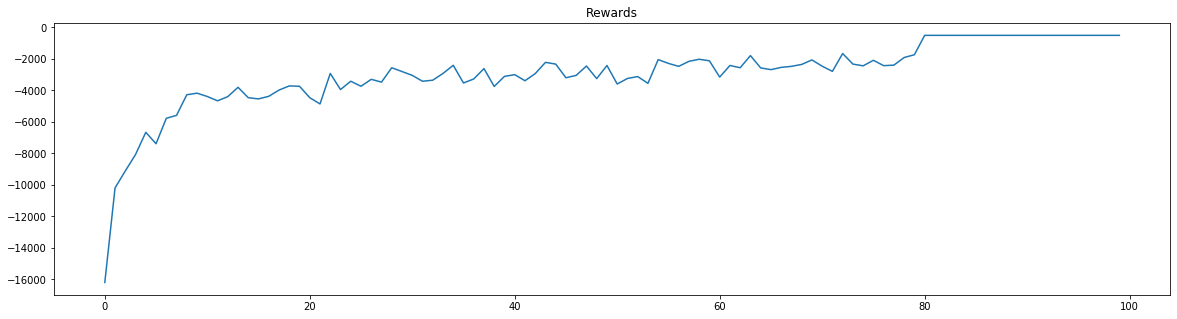

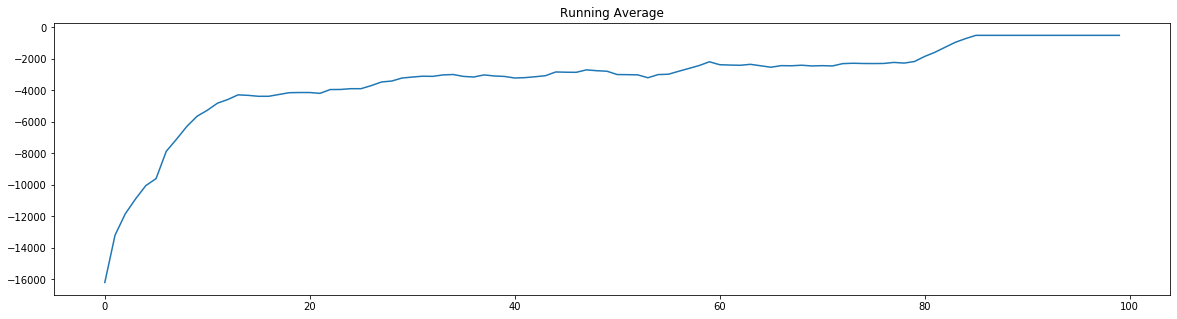

In [5]:
env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1,
             max_steps_per_episode=500)
model = QLearnerObsSeq(env, initial_alpha=.5, gamma=.9, alpha_decay=.4, seq_len=3)
eps = 1
n = 0
done = False
ot = env.reset()

N = 100
totalrewards = np.empty(N)
for n in range(N):
    if n >= N - (N/5):
        eps = 0
    else:
        eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward
    if n % (N/5) == 0:
        print(str(model))

print("avg reward for last {} episodes:".format(N/5),
      totalrewards[int(-1*(N/5)):].mean())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

plot_running_avg(totalrewards, window=5)